<a href="https://colab.research.google.com/github/NathanDietrich/Artificial-Intelligence-and-Machine-Learning-portfolio/blob/main/Trading_Bot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Started the project by following this tutorital of how to import financial Data
https://www.youtube.com/watch?v=t_vZDyQDUkk

In [33]:
import datetime as dt
import pandas as pd
from pandas_datareader import data as pdr
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

In [51]:
#define range of study
end = dt.datetime.now()
start = end - dt.timedelta(days = 35000)
start, end

(datetime.datetime(1928, 12, 11, 21, 6, 0, 267697),
 datetime.datetime(2024, 10, 8, 21, 6, 0, 267697))

In [52]:
#Choose stock tickers to study
#stocklist = ['NVDA', 'MSFT', 'TSLA', 'AAPL', 'CAVA']
#stockList = ['CBA', 'NAB', 'WBC', 'ANZ']
#stocks = [i + '.AX' for i in stockList]
stockList = ['NVDA', 'MSFT', 'AAPL', 'TSLA']
stocks = [i for i in stockList]
stocks

['NVDA', 'MSFT', 'AAPL', 'TSLA']

In [53]:
#pdr.DataReader(stocklist, 'yahoo', start, end)

df = yf.download(stocks, start, end)
df.head()

[*********************100%***********************]  4 of 4 completed


Price                     Adj Close                    Close                 \
Ticker                         AAPL MSFT NVDA TSLA      AAPL MSFT NVDA TSLA   
Date                                                                          
1980-12-12 00:00:00+00:00  0.098943  NaN  NaN  NaN  0.128348  NaN  NaN  NaN   
1980-12-15 00:00:00+00:00  0.093781  NaN  NaN  NaN  0.121652  NaN  NaN  NaN   
1980-12-16 00:00:00+00:00  0.086898  NaN  NaN  NaN  0.112723  NaN  NaN  NaN   
1980-12-17 00:00:00+00:00  0.089049  NaN  NaN  NaN  0.115513  NaN  NaN  NaN   
1980-12-18 00:00:00+00:00  0.091630  NaN  NaN  NaN  0.118862  NaN  NaN  NaN   

Price                          High       ...  Low           Open            \
Ticker                         AAPL MSFT  ... NVDA TSLA      AAPL MSFT NVDA   
Date                                      ...                                 
1980-12-12 00:00:00+00:00  0.128906  NaN  ...  NaN  NaN  0.128348  NaN  NaN   
1980-12-15 00:00:00+00:00  0.122210  NaN  ...  NaN  NaN  0.122210  NaN  NaN   
1980-12-16 00:00:00+00:00  0.113281  NaN  ...  NaN  NaN  0.113281  NaN  NaN   
1980-12-17 00:00:00+00:00  0.116071  NaN  ...  NaN  NaN  0.115513  NaN  NaN   
1980-12-18 00:00:00+00:00  0.119420  NaN  ...  NaN  NaN  0.118862  NaN  NaN   

Price                              Volume                 
Ticker                    TSLA       AAPL MSFT NVDA TSLA  
Date                                                      
1980-12-12 00:00:00+00:00  NaN  469033600  NaN  NaN  NaN  
1980-12-15 00:00:00+00:00  NaN  175884800  NaN  NaN  NaN  
1980-12-16 00:00:00+00:00  NaN  105728000  NaN  NaN  NaN  
1980-12-17 00:00:00+00:00  NaN   86441600  NaN  NaN  NaN  
1980-12-18 00:00:00+00:00  NaN   73449600  NaN  NaN  NaN  

[5 rows x 24 columns]

In [54]:
df.index

DatetimeIndex(['1980-12-12 00:00:00+00:00', '1980-12-15 00:00:00+00:00',
               '1980-12-16 00:00:00+00:00', '1980-12-17 00:00:00+00:00',
               '1980-12-18 00:00:00+00:00', '1980-12-19 00:00:00+00:00',
               '1980-12-22 00:00:00+00:00', '1980-12-23 00:00:00+00:00',
               '1980-12-24 00:00:00+00:00', '1980-12-26 00:00:00+00:00',
               ...
               '2024-09-25 00:00:00+00:00', '2024-09-26 00:00:00+00:00',
               '2024-09-27 00:00:00+00:00', '2024-09-30 00:00:00+00:00',
               '2024-10-01 00:00:00+00:00', '2024-10-02 00:00:00+00:00',
               '2024-10-03 00:00:00+00:00', '2024-10-04 00:00:00+00:00',
               '2024-10-07 00:00:00+00:00', '2024-10-08 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=11047, freq=None)

In [55]:
df.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close', 'MSFT'),
            ('Adj Close', 'NVDA'),
            ('Adj Close', 'TSLA'),
            (    'Close', 'AAPL'),
            (    'Close', 'MSFT'),
            (    'Close', 'NVDA'),
            (    'Close', 'TSLA'),
            (     'High', 'AAPL'),
            (     'High', 'MSFT'),
            (     'High', 'NVDA'),
            (     'High', 'TSLA'),
            (      'Low', 'AAPL'),
            (      'Low', 'MSFT'),
            (      'Low', 'NVDA'),
            (      'Low', 'TSLA'),
            (     'Open', 'AAPL'),
            (     'Open', 'MSFT'),
            (     'Open', 'NVDA'),
            (     'Open', 'TSLA'),
            (   'Volume', 'AAPL'),
            (   'Volume', 'MSFT'),
            (   'Volume', 'NVDA'),
            (   'Volume', 'TSLA')],
           names=['Price', 'Ticker'])

In [56]:
Close = df.Close
Close.head()

Ticker,AAPL,MSFT,NVDA,TSLA
Date,,,,
1980-12-12 00:00:00+00:00,0.128348,NaN,NaN,NaN
1980-12-15 00:00:00+00:00,0.121652,NaN,NaN,NaN
1980-12-16 00:00:00+00:00,0.112723,NaN,NaN,NaN
1980-12-17 00:00:00+00:00,0.115513,NaN,NaN,NaN
1980-12-18 00:00:00+00:00,0.118862,NaN,NaN,NaN


In [57]:
Close.describe()

Ticker,AAPL,MSFT,NVDA,TSLA
count,11047.000000,9721.000000,6470.000000,3594.000000
mean,23.202849,60.229316,7.047710,77.523364
std,47.833394,93.455534,18.731609,103.243073
min,0.049107,0.090278,0.034115,1.053333
25%,0.299107,5.750000,0.278536,11.869000
50%,0.535714,27.389999,0.461250,17.603666
75%,20.658929,47.000000,4.307250,171.864998
max,234.820007,467.559998,135.580002,409.970001


<Axes: xlabel='Date'>

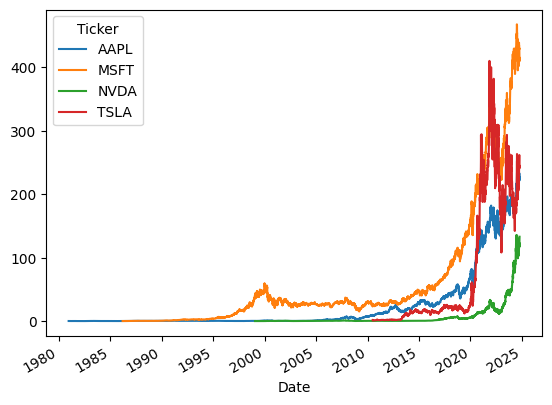

In [58]:
Close.plot()